In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo, list_available_datasets #Import ucidatasets
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_iris
from sklearn.model_selection import ValidationCurveDisplay
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 

# metadata 
print(car_evaluation.metadata) 
  
# variable information 
print(car_evaluation.variables)

y = np.ravel(y)
X = pd.get_dummies(X)

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'published_in': '8th Intl Workshop on Expert Systems and their Applications, Avignon, France', 'yea

In [8]:

# Splitting the data into tst and train
# 80 - 20 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

# Making the Neural Network Classifier
NN = MLPClassifier(max_iter=90,tol=1e-8, verbose=True)

# Training the model on the training data and labels
NN.fit(X_train, y_train)

# Testing the model i.e. predicting the labels of the test data.
y_pred = NN.predict(X_test)

# Evaluating the results of the model
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the Results
print("Accuracy for Neural Network is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Iteration 1, loss = 1.60544239
Iteration 2, loss = 1.35171337
Iteration 3, loss = 1.14485110
Iteration 4, loss = 0.99218544
Iteration 5, loss = 0.88555636
Iteration 6, loss = 0.81565128
Iteration 7, loss = 0.76627420
Iteration 8, loss = 0.72643975
Iteration 9, loss = 0.69133988
Iteration 10, loss = 0.66101909
Iteration 11, loss = 0.63177598
Iteration 12, loss = 0.60421569
Iteration 13, loss = 0.57791398
Iteration 14, loss = 0.55314537
Iteration 15, loss = 0.52999144
Iteration 16, loss = 0.50728531
Iteration 17, loss = 0.48690394
Iteration 18, loss = 0.46762109
Iteration 19, loss = 0.44948814
Iteration 20, loss = 0.43227148
Iteration 21, loss = 0.41632160
Iteration 22, loss = 0.40130846
Iteration 23, loss = 0.38724856
Iteration 24, loss = 0.37394624
Iteration 25, loss = 0.36098260
Iteration 26, loss = 0.34914045
Iteration 27, loss = 0.33781519
Iteration 28, loss = 0.32733798
Iteration 29, loss = 0.31690809
Iteration 30, loss = 0.30725443
Iteration 31, loss = 0.29845006
Iteration 32, los

c:\Users\Drewn\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.91      0.98      0.94        83
        good       0.82      0.69      0.75        13
       unacc       1.00      0.98      0.99       241
       vgood       0.78      0.78      0.78         9

    accuracy                           0.97       346
   macro avg       0.88      0.86      0.87       346
weighted avg       0.97      0.97      0.97       346



<module 'matplotlib.pyplot' from 'C:\\Users\\Drewn\\AppData\\Roaming\\Python\\Python311\\site-packages\\matplotlib\\pyplot.py'>

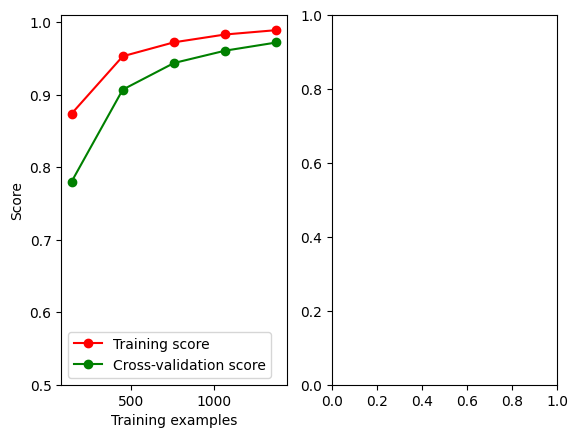

In [6]:
def plot_learning_curve(estimator, X, y, ax=None, ylim=(0.5, 1.01), cv=None, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
              
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.legend(loc="best")

    return plt

fig, (ax1, ax2) = plt.subplots(1, 2)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(NN, X, y, ax = ax1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))